# -*- coding: utf-8 -*-
"""
Created on Mon Apr  4 17:09:51 2022

@author: etienne
"""

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import glob
import re
import pandas as pd
import platform  # Import platform module


plt.style.use('./custom_latex_style.mplstyle')


In [46]:
# Function to get the OS type
def get_os_type():
    os_type = platform.system().lower()
    if 'linux' in os_type or 'darwin' in os_type:  # Darwin is for MacOS
        return 'unix'
    elif 'windows' in os_type:
        return 'windows'
    else:
        raise ValueError("Unsupported operating system")


In [47]:
# Filename
filename = 'driver_EX1'


# Ensure the outputFiles directory exists
output_dir = 'outputFiles'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Determine the command based on OS type
os_type = get_os_type()
if os_type == 'unix':
    command = 'wine ./bin/AeroDyn_Driver_x64.exe ' + filename + '.dvr'
elif os_type == 'windows':
    command = r'.\bin\AeroDyn_Driver_x64.exe ' + filename + '.dvr'

# Execute the command
os.system(command)


Index(['(m/s)', '(-)', '(rpm)', '(deg)', '(deg).1', '(s)', '(s).1'], dtype='object')


0

In [48]:
# %%
# Moves the output files into the correct folder
sourcepath = os.getcwd()
target_folder = r'./outputFiles'
sourcefiles = '*.out'
filelist=glob.glob(sourcefiles)
for single_file in filelist:
    shutil.move(os.path.join(sourcepath, single_file), os.path.join(target_folder, single_file))


In [49]:
# %%

# Number of cases simulated
filelist=glob.glob(target_folder + '/' + sourcefiles)
NumCases=len(filelist)   

# Preallocation
TSR_curve=np.zeros([NumCases])    
Cp_curve=np.zeros([NumCases])
Ct_curve=np.zeros([NumCases])
Cq_curve=np.zeros([NumCases])
thrust_curve=np.zeros([NumCases])
speed_curve=np.zeros([NumCases])
wndspeed=np.zeros([NumCases])
power_curve=np.zeros([NumCases])

for i in range (NumCases):
    
    myFile = r'./outputFiles/' + filename + '.'+ str(i+1) + '.out'
    
    
    # Read wind speed
    s =  pd.read_csv(myFile, skiprows=3, nrows=2)
    a = (re.findall( r'\d+\.*\d*', str(s.head())))
    wndspeed[i] = float(a[1])
    
    
    # Read outputs
    s =  pd.read_csv(myFile, header=5, sep='\s+')
    outputfile = np.array(s)
    time= outputfile[:,0]
    ind = np.argmin(np.abs(time-8)) # read only the last 2 seconds
    
    speed_curve[i]= np.mean(outputfile[ind:-1,1])
    TSR_curve[i]= np.mean(outputfile[ind:-1,2])
    power_curve[i]= np.mean(outputfile[ind:-1,3])
    thrust_curve[i]= np.mean(outputfile[ind:-1,4])
    Cp_curve[i]= np.mean(outputfile[ind:-1,5])
    Ct_curve[i]= np.mean(outputfile[ind:-1,6])
    Cq_curve[i]= np.mean(outputfile[ind:-1,7])


print(max(Cp_curve))


0.4862330365


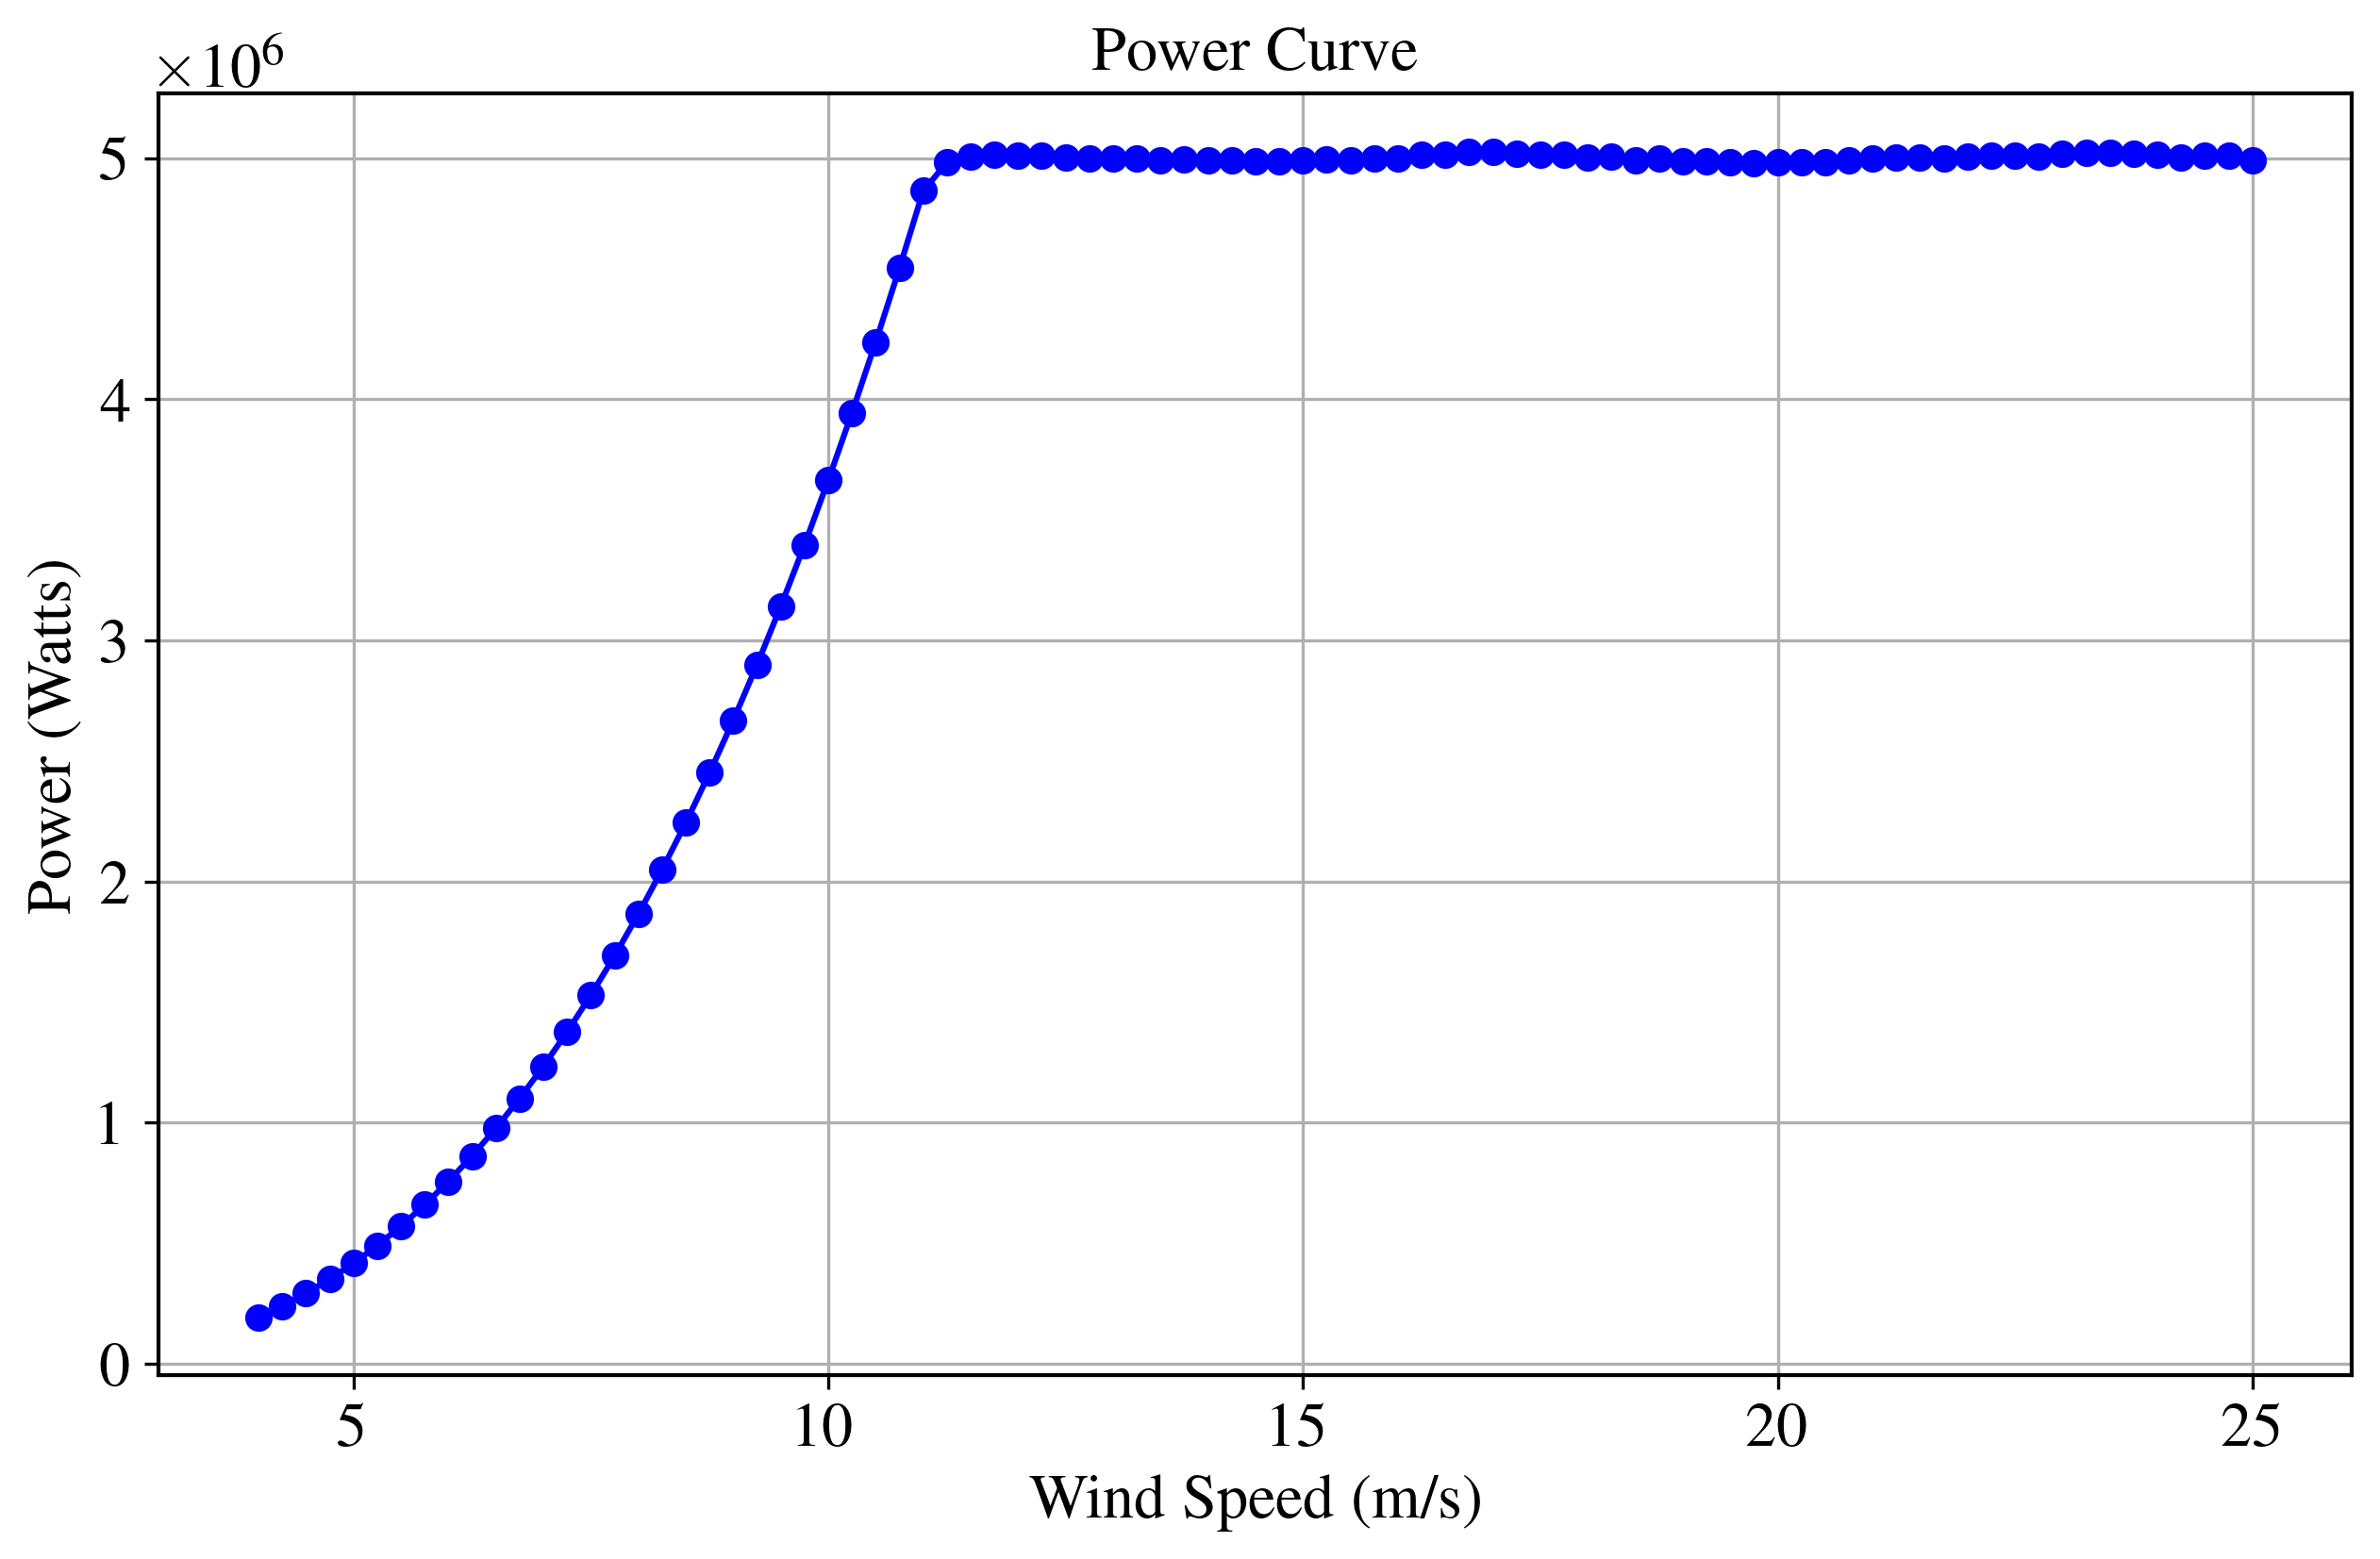

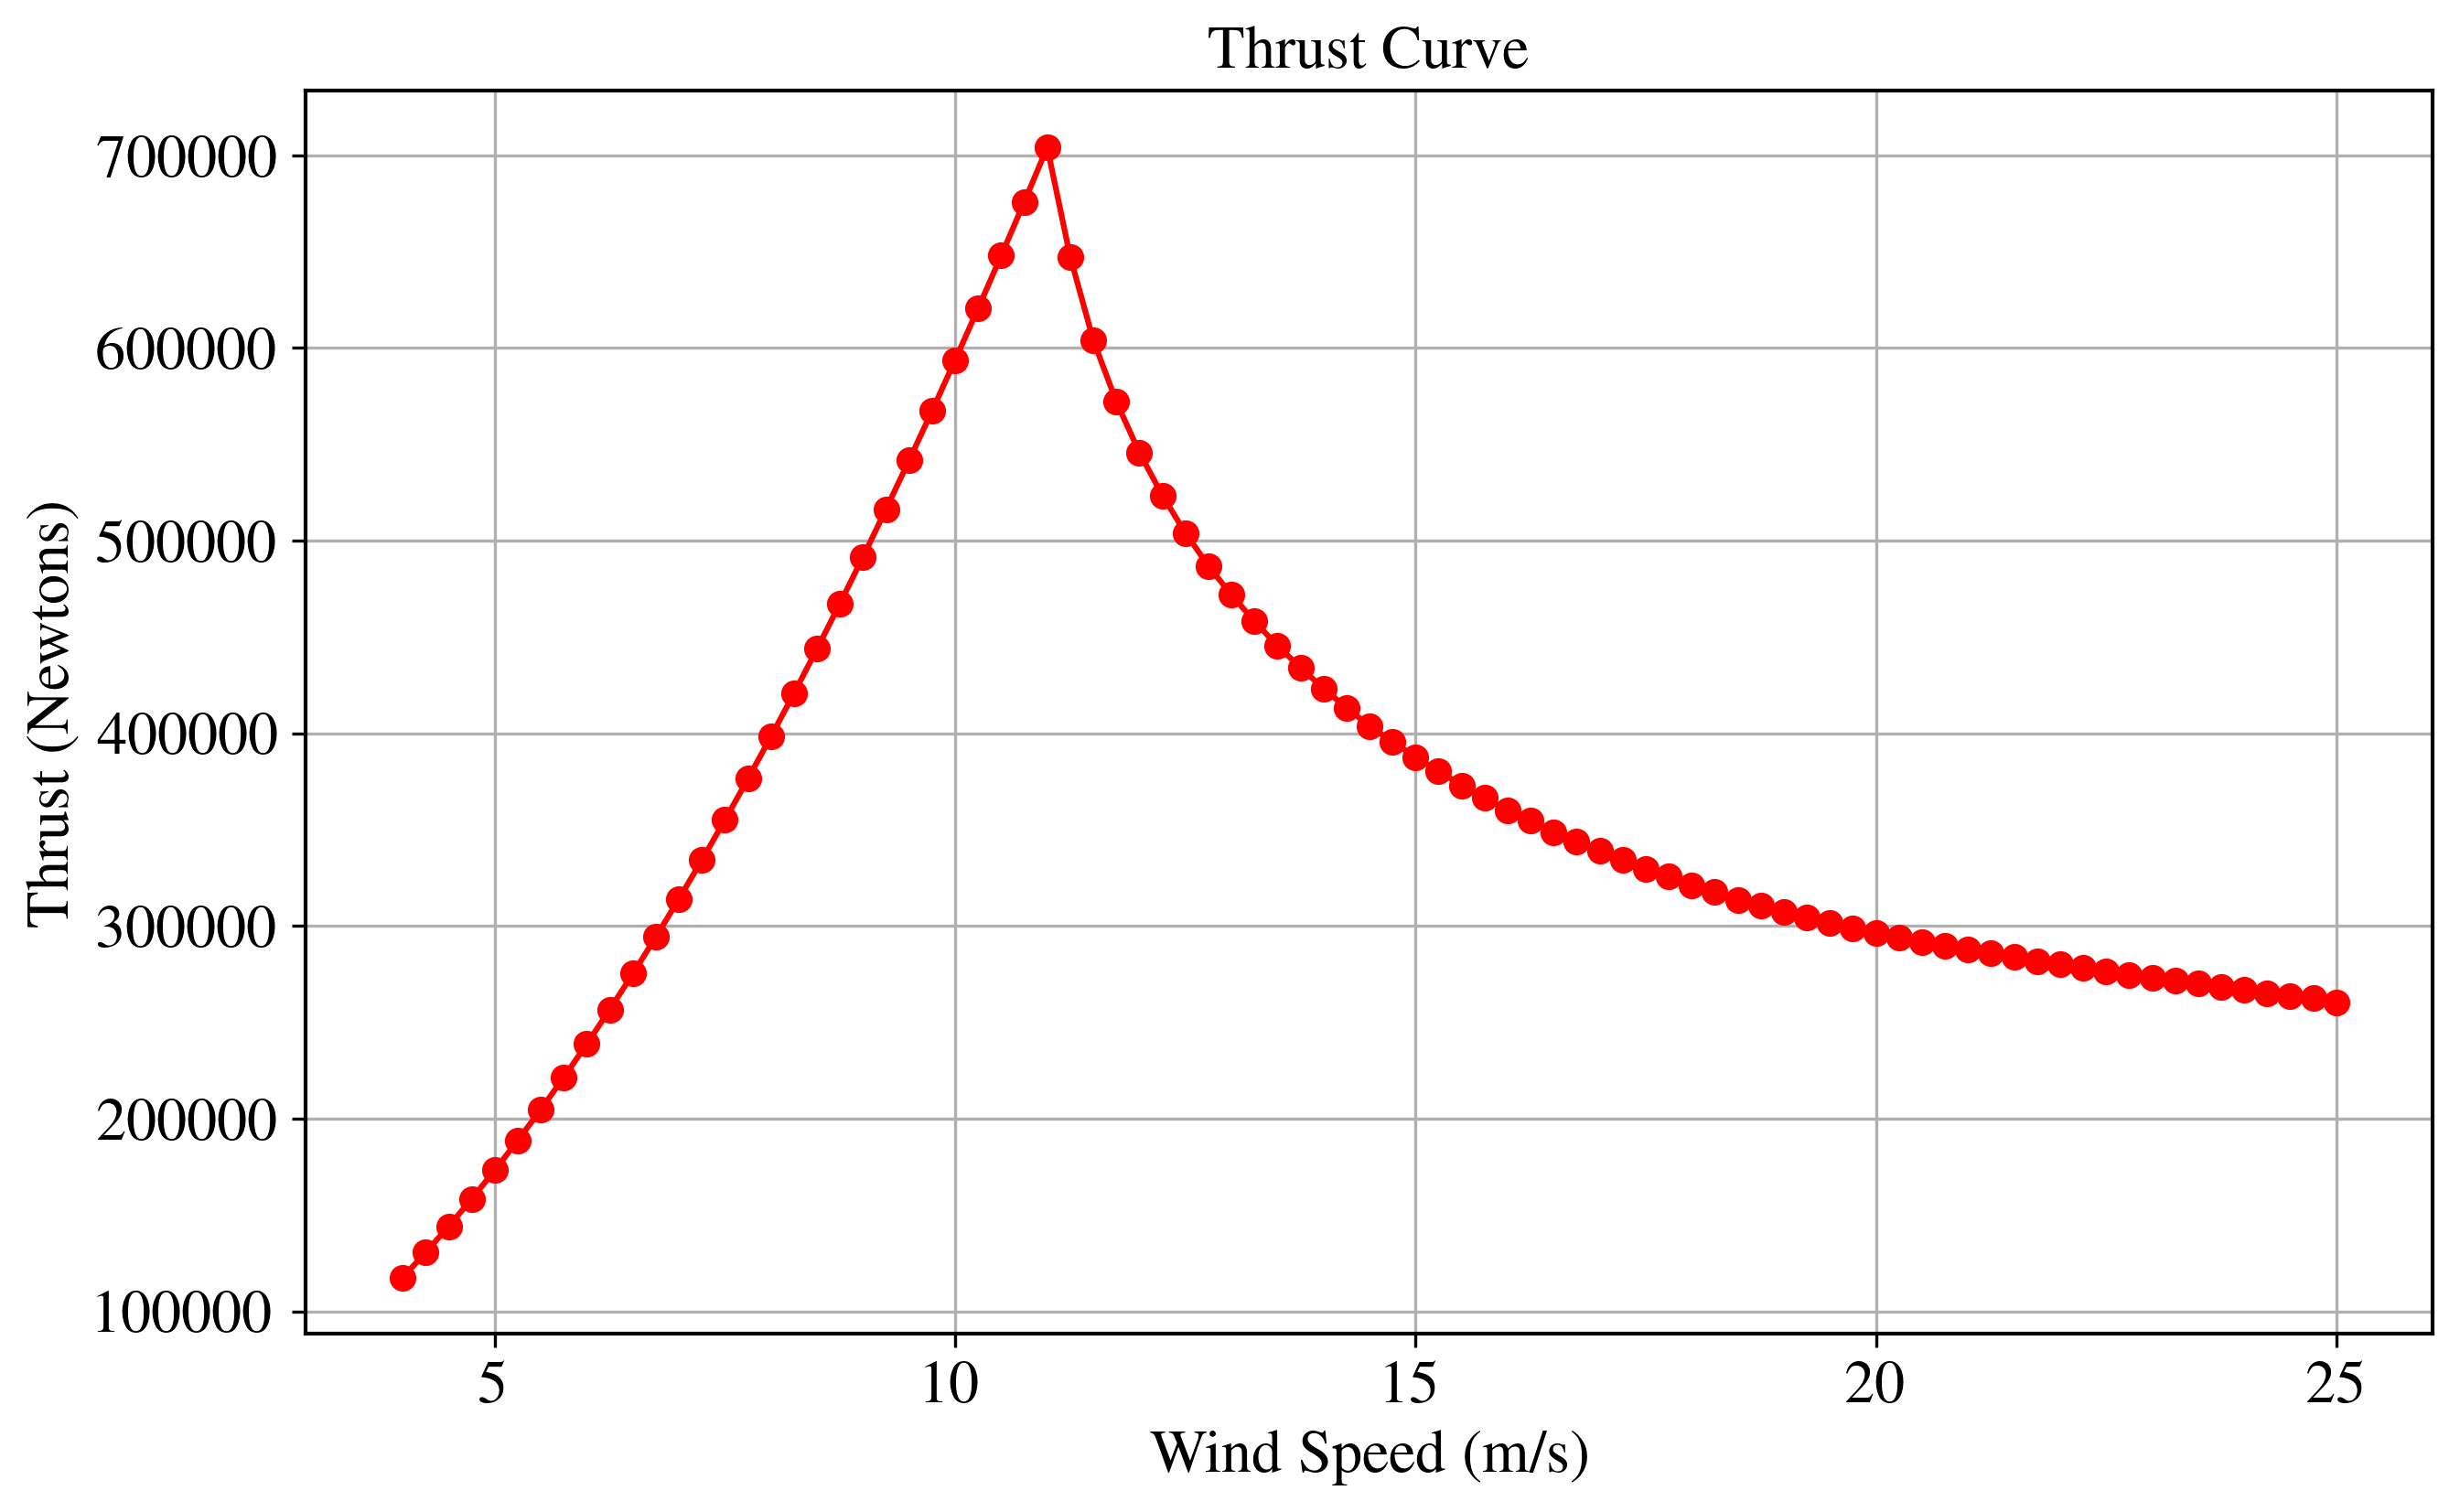

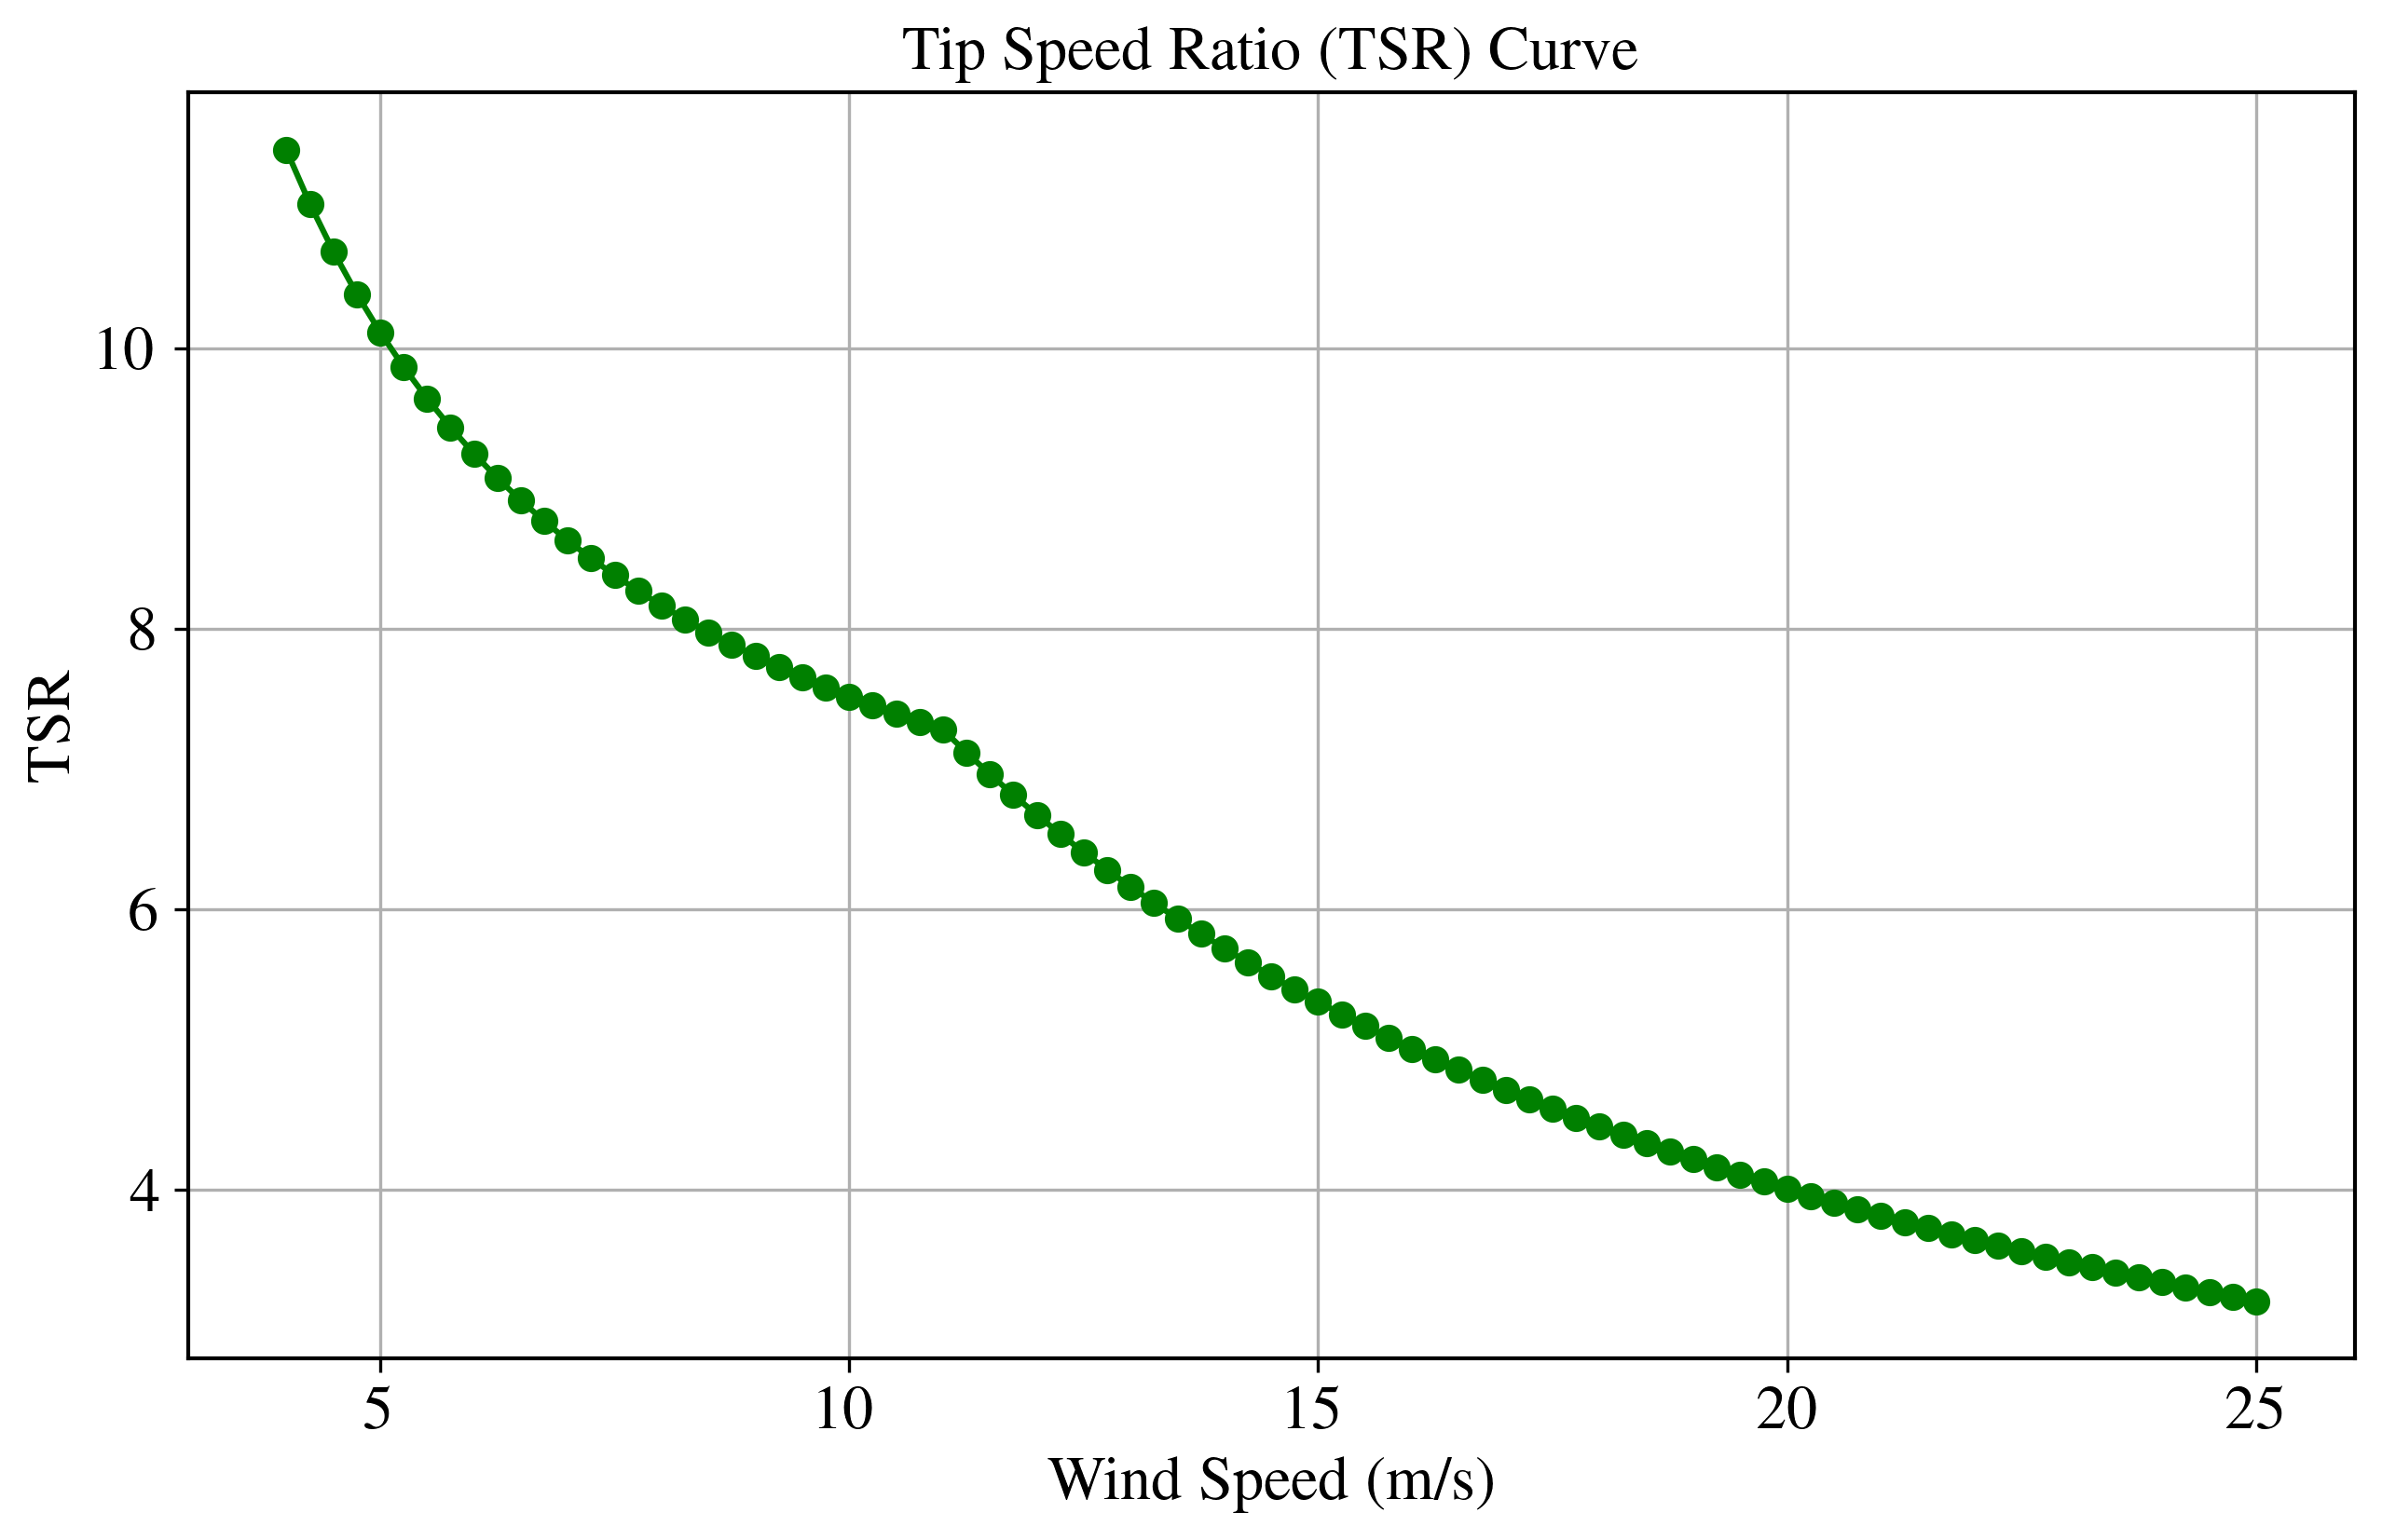

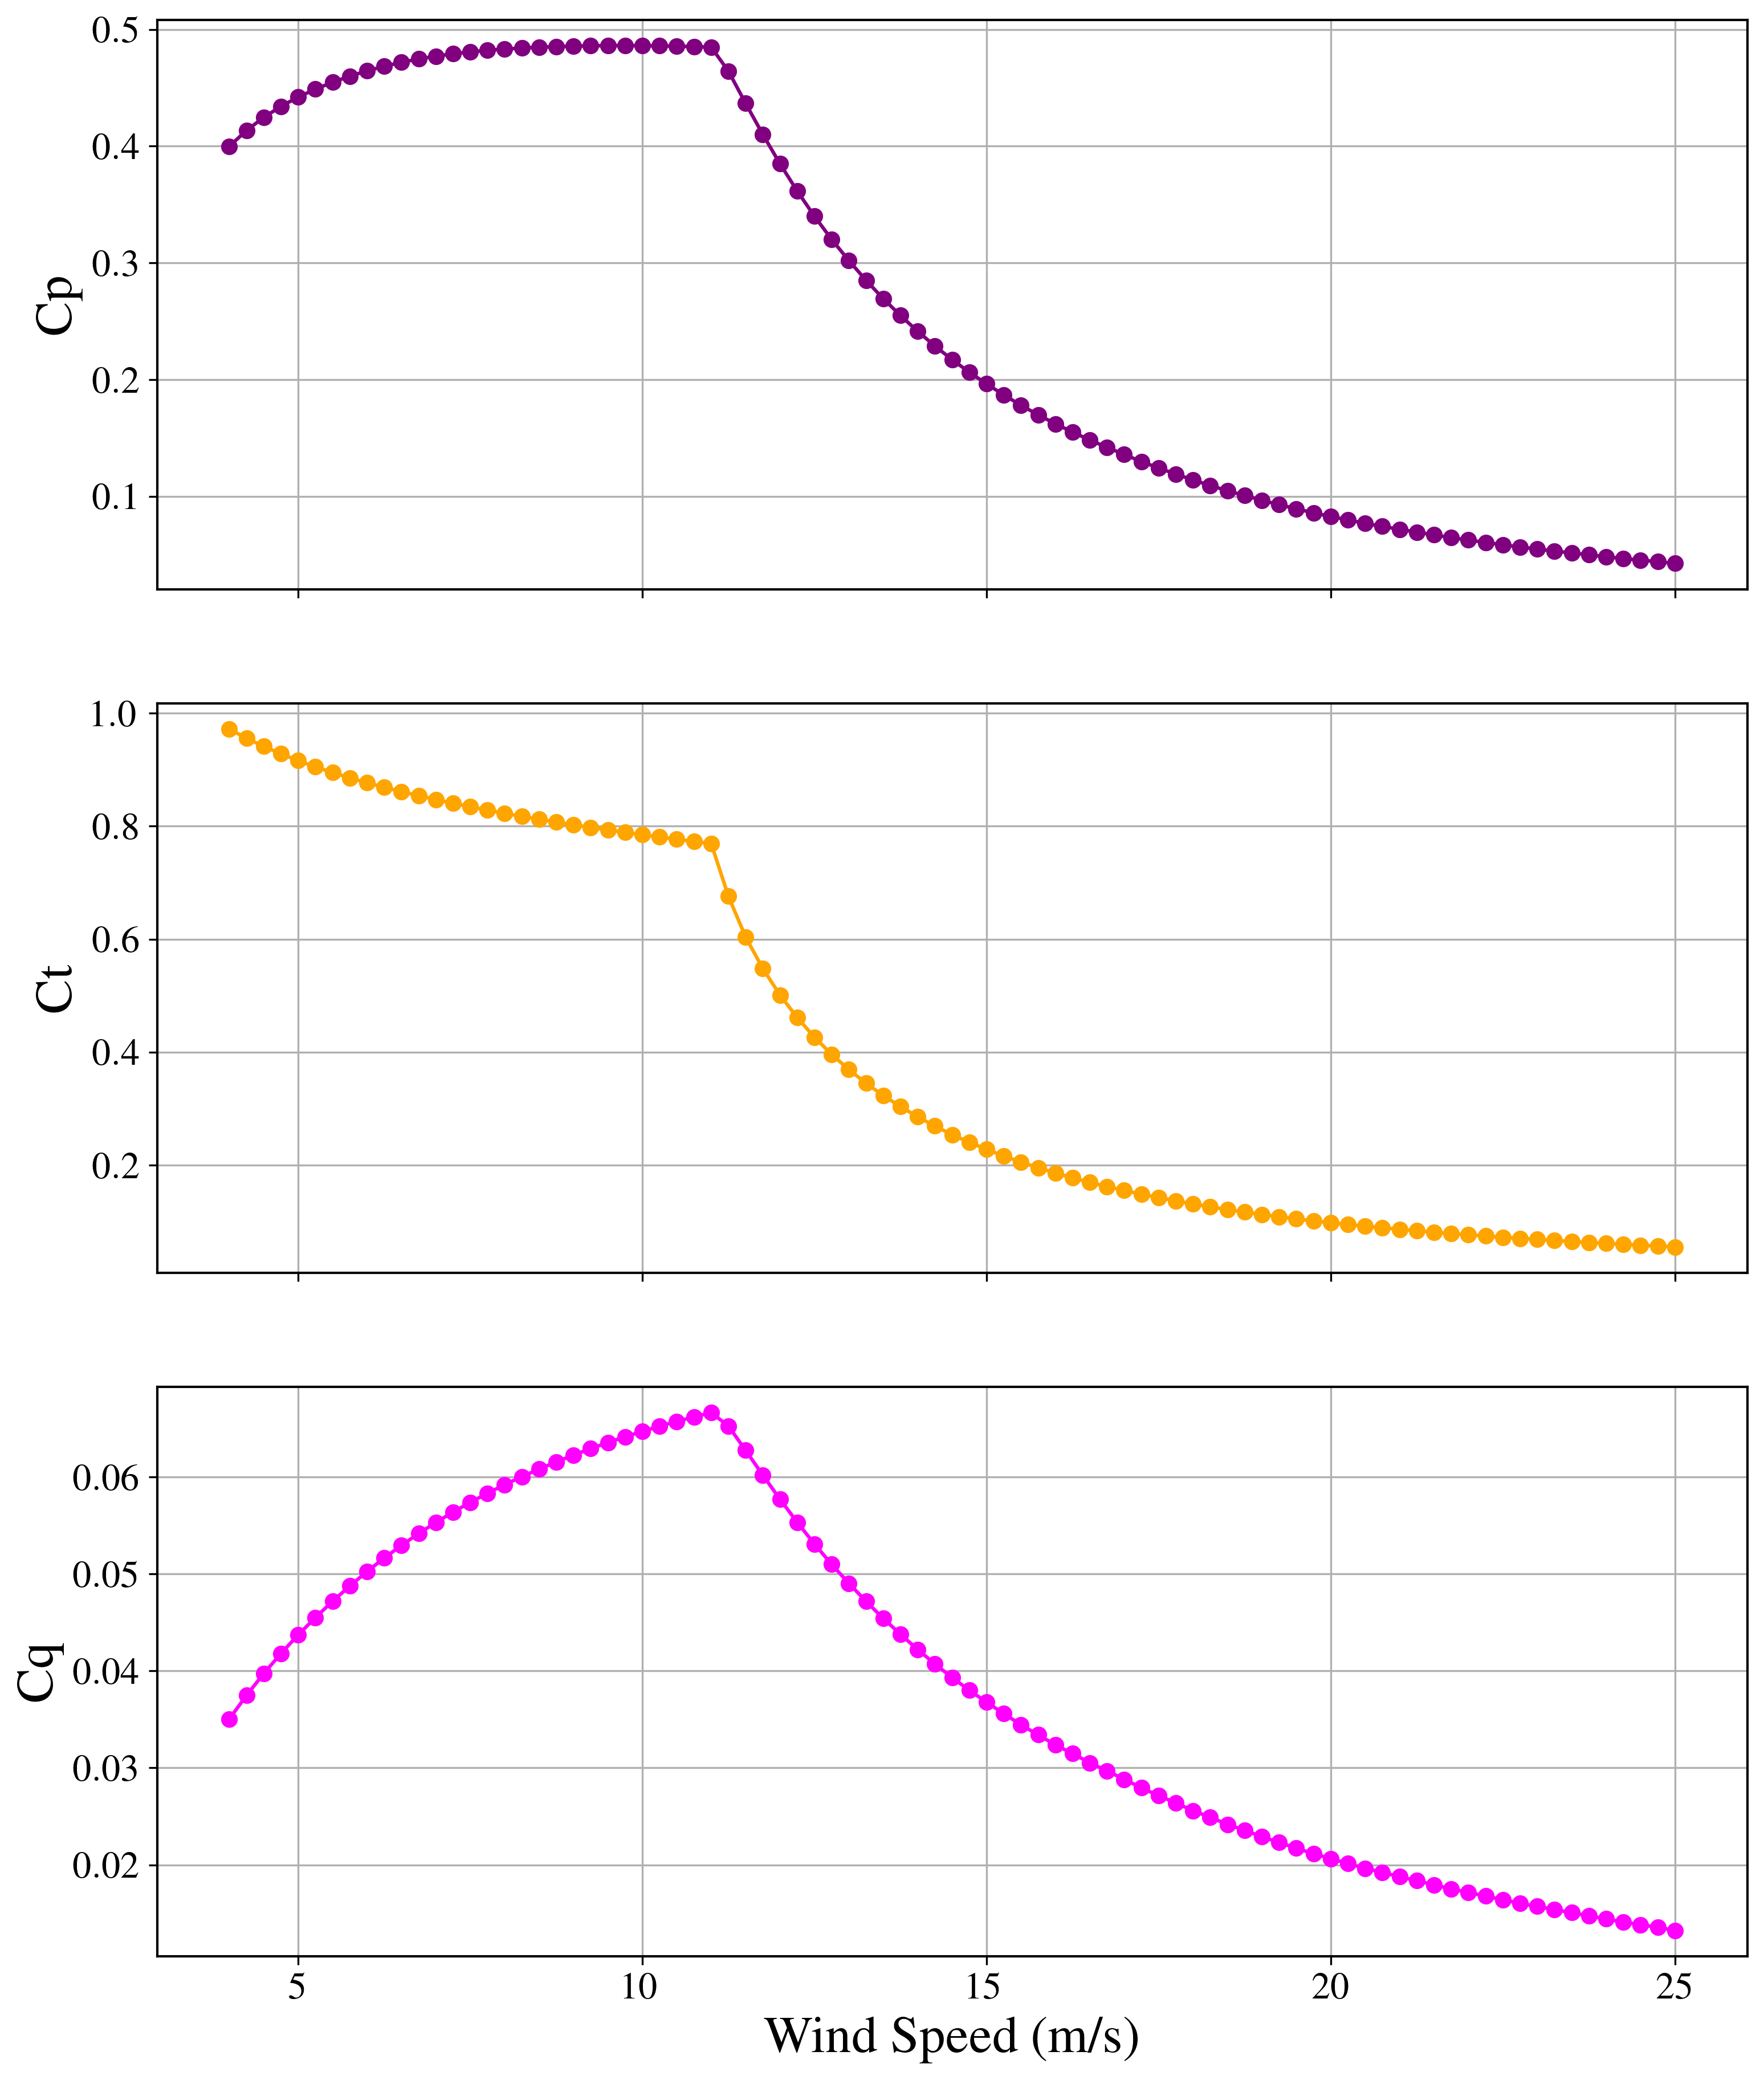

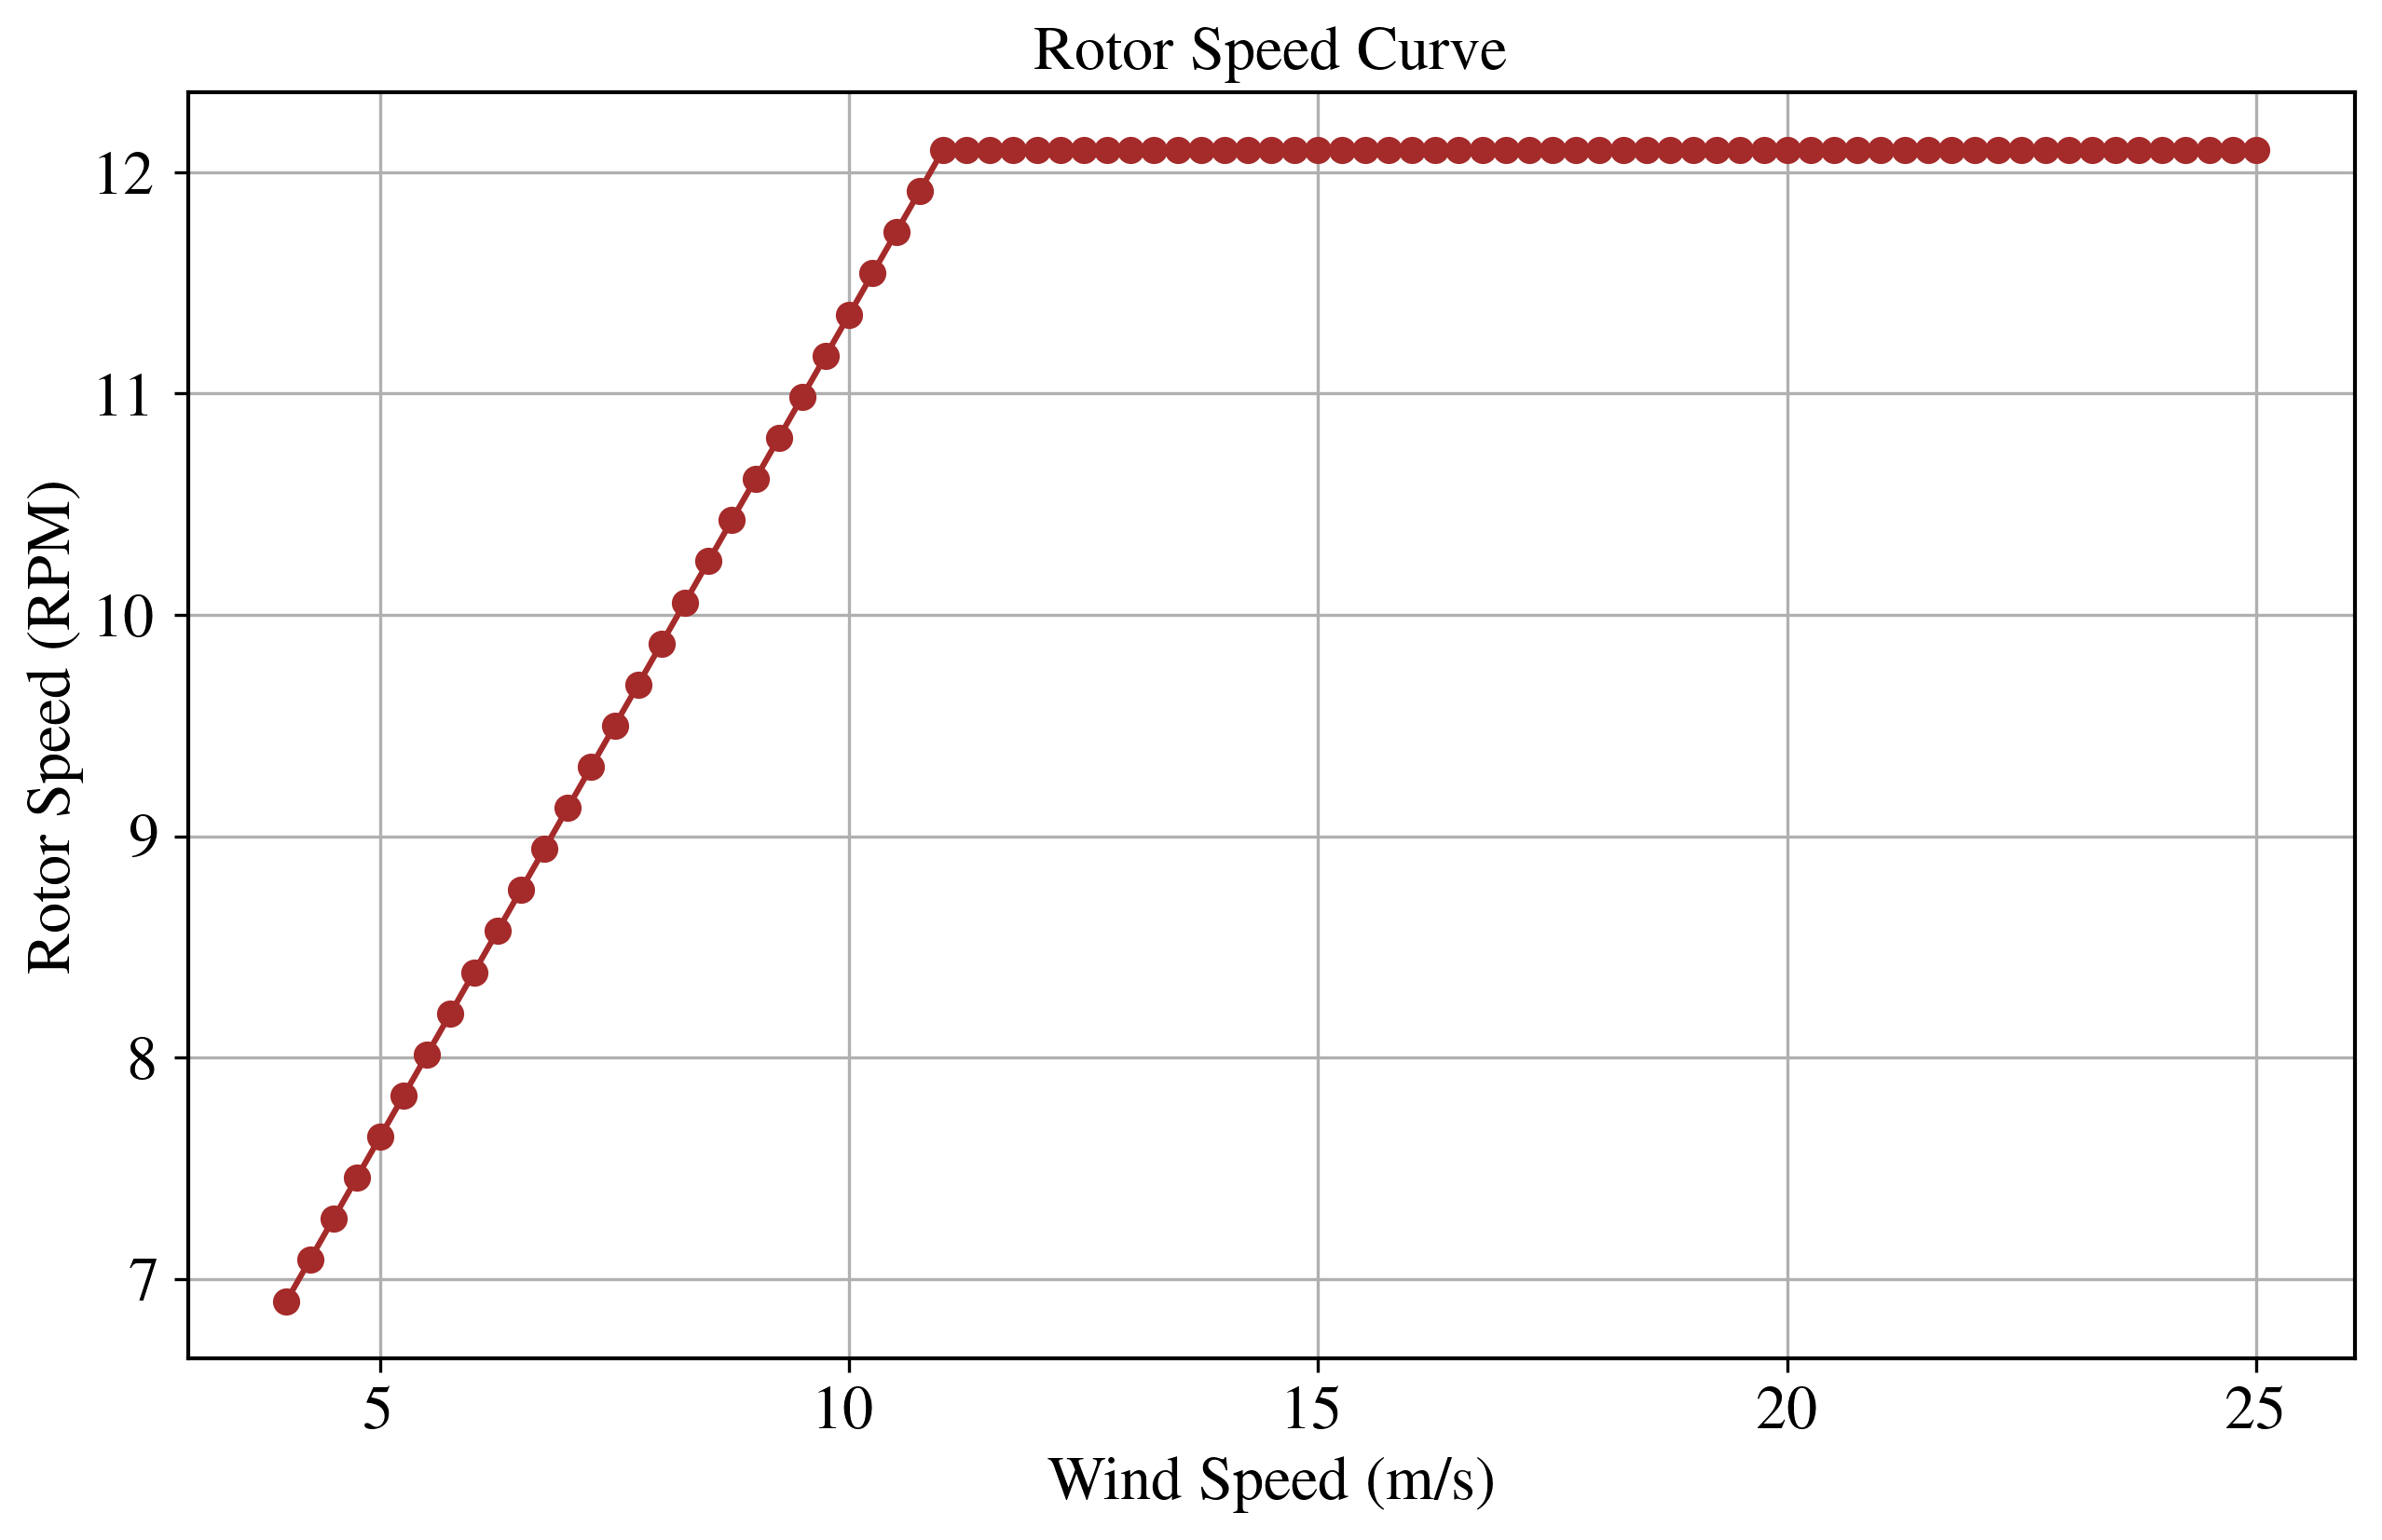

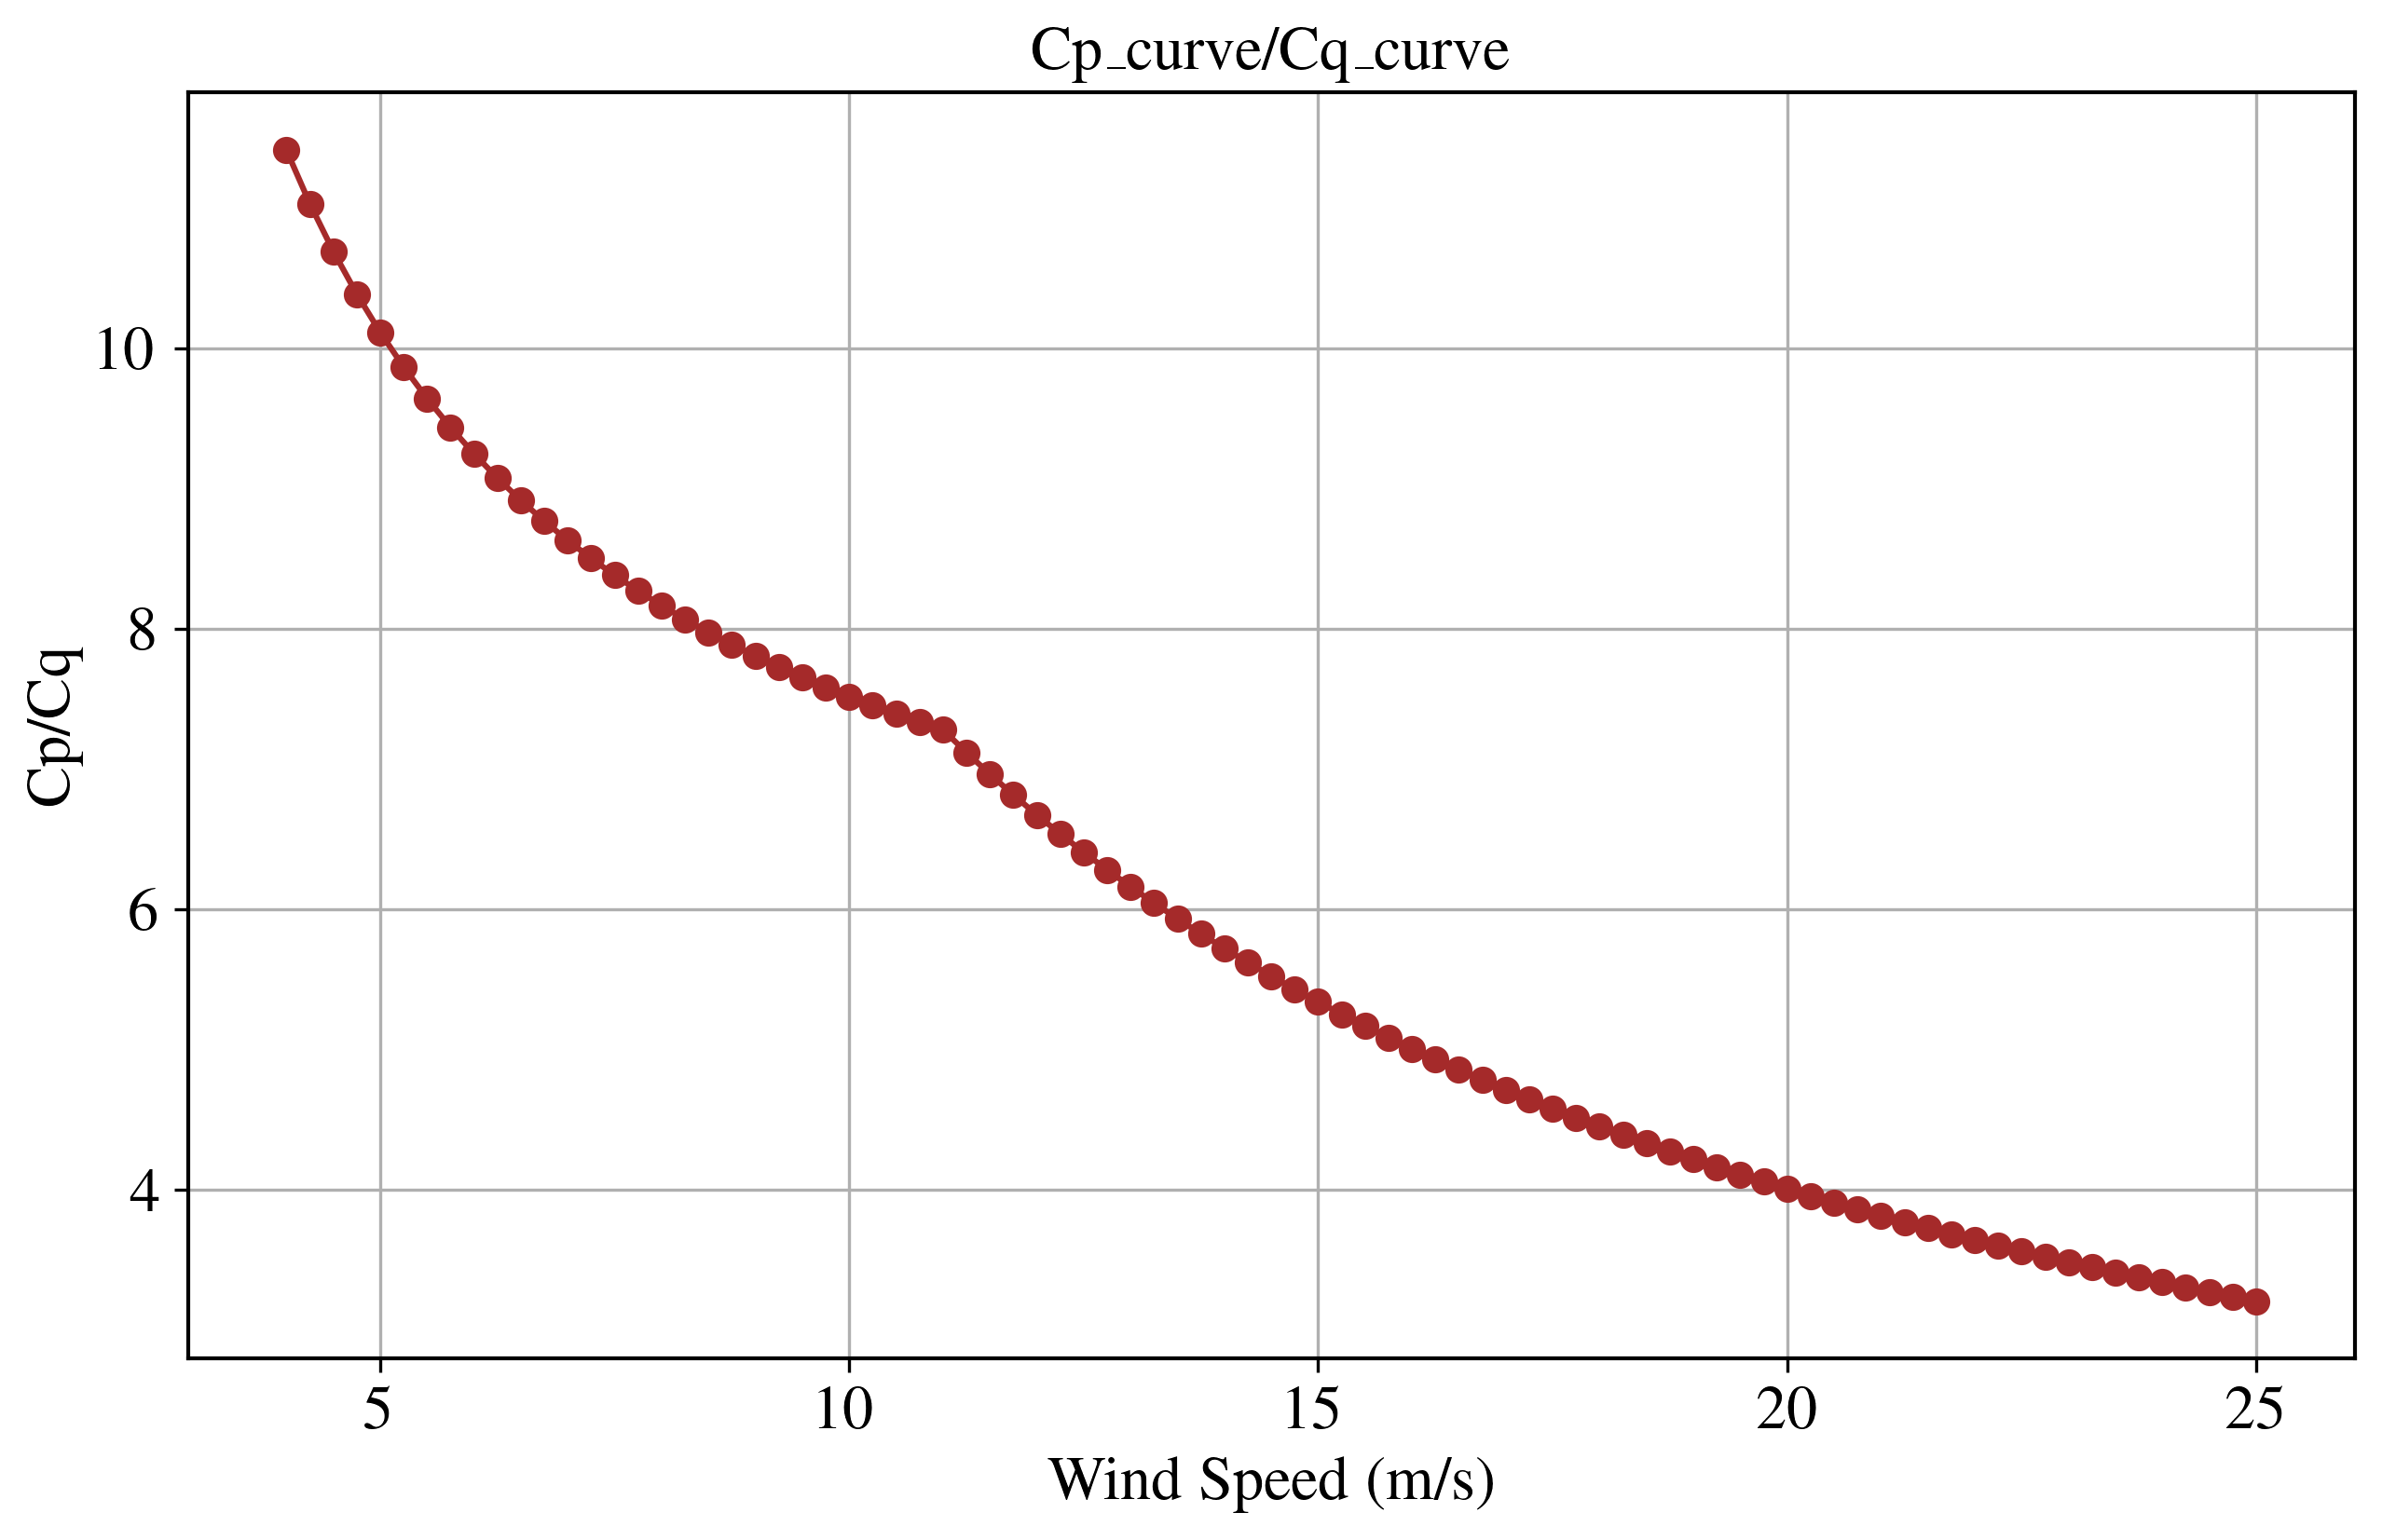

In [50]:
#%%  Plotting

 # short test: plt.plot(wndspeed,power_curve)

#

# Power Curve
plt.figure(figsize=(10, 6))
plt.plot(wndspeed, power_curve, 'o-', color='blue')
plt.title('Power Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (Watts)')
plt.grid(True)
plt.savefig('figures/power_curve.pdf')

# Thrust Curve
plt.figure(figsize=(10, 6))
plt.plot(wndspeed, thrust_curve, 'o-', color='red')
plt.title('Thrust Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Thrust (Newtons)')
plt.grid(True)
plt.savefig('figures/thrust_curve.pdf')

# Tip Speed Ratio (TSR) Curve
plt.figure(figsize=(10, 6))
plt.plot(wndspeed, TSR_curve, 'o-', color='green')
plt.title('Tip Speed Ratio (TSR) Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('TSR')
plt.grid(True)
plt.savefig('figures/tip_speed_ratio.pdf')

fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Coefficient of Performance (Cp) Curve
axs[0].plot(wndspeed, Cp_curve, 'o-', color='purple')
axs[0].set_ylabel('Cp', fontsize=22)
axs[0].grid(True)

# Coefficient of Thrust (Ct) Curve
axs[1].plot(wndspeed, Ct_curve, 'o-', color='orange')
axs[1].set_ylabel('Ct', fontsize=22)
axs[1].grid(True)

# Coefficient of Torque (Cq) Curve
axs[2].plot(wndspeed, Cq_curve, 'o-', color='magenta')
axs[2].set_xlabel('Wind Speed (m/s)', fontsize=22)
axs[2].set_ylabel('Cq', fontsize=22)
axs[2].grid(True)

plt.savefig('figures/coefficient_curves.pdf')

# Rotor Speed Curve
plt.figure(figsize=(10, 6))
plt.plot(wndspeed, speed_curve, 'o-', color='brown')
plt.title('Rotor Speed Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Rotor Speed (RPM)')
plt.grid(True)
plt.savefig('figures/rotor_speed_curve.pdf')



plt.figure(figsize=(10, 6))
plt.plot(wndspeed, Cp_curve/Cq_curve, 'o-', color='brown')
plt.title('Cp_curve/Cq_curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Cp/Cq')
plt.grid(True)
plt.savefig('figures/Cp_curve_Cq_curve.pdf')